In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('steam.csv')

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [5]:
# release date to datetime is converted
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Drop rows with missing release dates
df = df.dropna(subset=['release_date'])

#  year and month for trend analysis is extracted
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

#  missing prices is filled with 0 (free games)
df['price'] = df['price'].fillna(0)

# Calculate rating metrics
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']
df['rating_ratio'] = df['positive_ratings'] / df['total_ratings'].replace(0, 1)


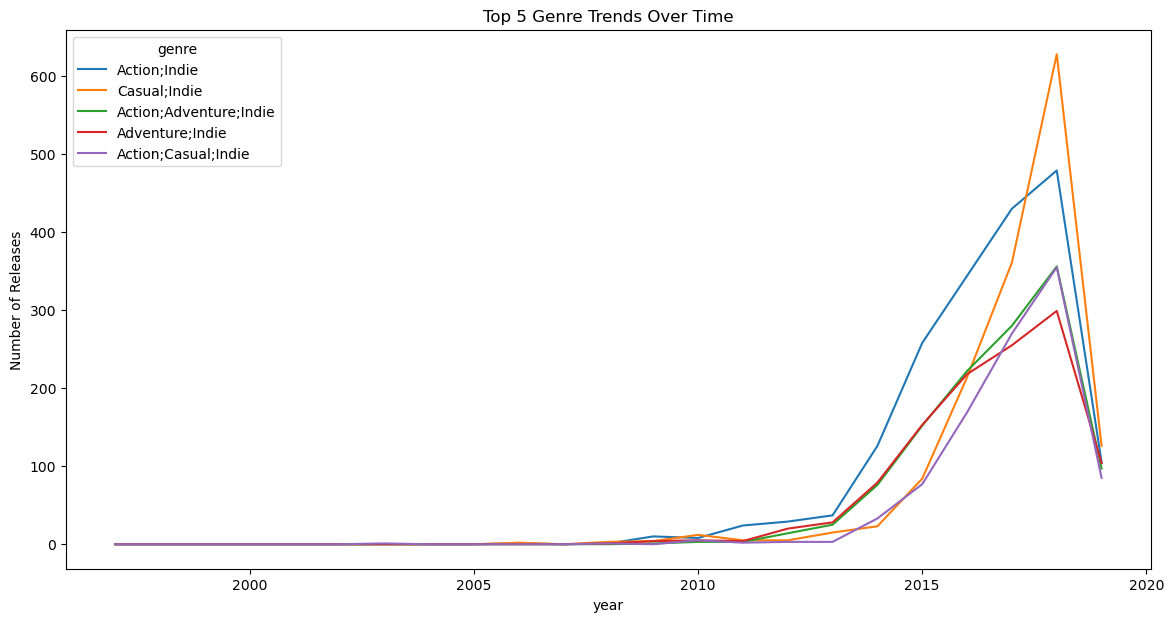

In [7]:
# a new dataframe to hold year and genre pairs
genre_years = []

for index, row in df.iterrows():
    if pd.notna(row['genres']):
        genres = row['genres'].split(',')
        for genre in genres:
            genre_years.append({'year': row['year'], 'genre': genre.strip()})

# Convert to DataFrame
genre_df = pd.DataFrame(genre_years)

# Group and pivot
genre_trend = genre_df.groupby(['year', 'genre']).size().reset_index(name='count')
genre_pivot = genre_trend.pivot(index='year', columns='genre', values='count').fillna(0)

# Plot trend of top 5 genres
top_genres = genre_df['genre'].value_counts().head(5).index
genre_pivot[top_genres].plot(figsize=(14, 7), title='Top 5 Genre Trends Over Time')
plt.ylabel('Number of Releases')
plt.show()


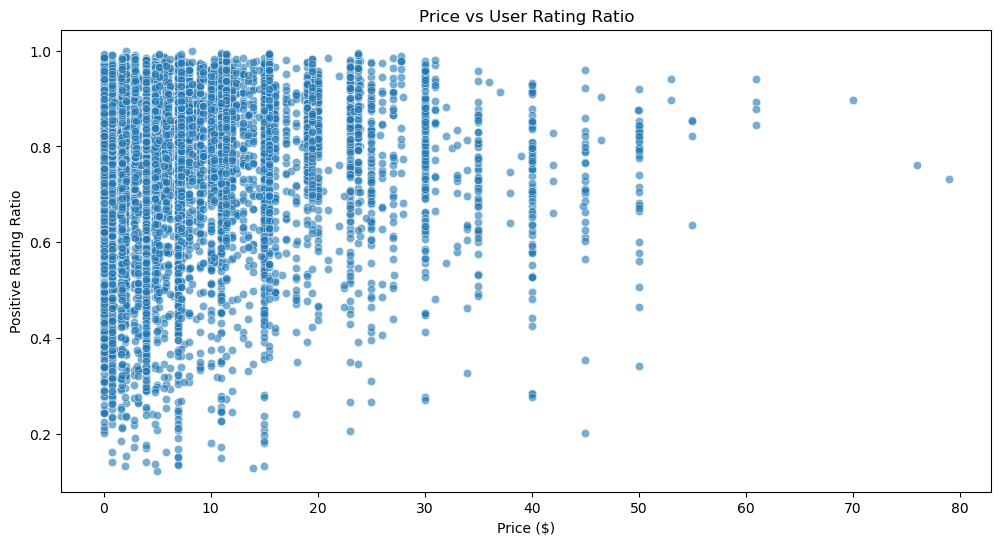

In [9]:
# Filter games with at least 100 ratings
filtered = df[df['total_ratings'] > 100]

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered, x='price', y='rating_ratio', alpha=0.6)
plt.title('Price vs User Rating Ratio')
plt.xlabel('Price ($)')
plt.ylabel('Positive Rating Ratio')
plt.show()

C:\Users\ROSALIN\AppData\Local\Temp\ipykernel_10456\2044732962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_release, x='month', y='release_count', palette='coolwarm')


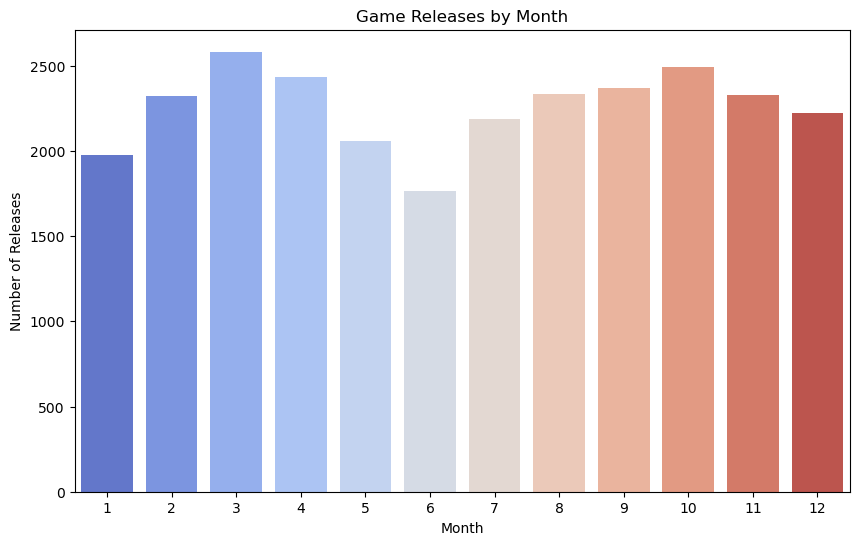

In [11]:
monthly_release = df.groupby('month').size().reset_index(name='release_count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_release, x='month', y='release_count', palette='coolwarm')
plt.title('Game Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.show()

In [13]:
# Export cleaned main dataset
df.to_csv('steam_cleaned.csv', index=False)

# Export genre-year grouped data
genre_trend.to_csv('genre_trends.csv', index=False)

# Export monthly release data
monthly_release.to_csv('monthly_release.csv', index=False)